### Getting and Extract Image

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unrar x gdrive/My\ Drive/Datasets/bottle_dataset.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from gdrive/My Drive/Datasets/bottle_dataset.rar

Creating    bottle_dataset                                            OK
Creating    bottle_dataset/Mizone Active Minuman Isotonik Lychee Lemon  OK
Extracting  bottle_dataset/Mizone Active Minuman Isotonik Lychee Lemon/036d87a2-9767-45f2-a922-f51da71cee1d - Copy - Copy - Copy.jpg       0%  OK 
Extracting  bottle_dataset/Mizone Active Minuman Isotonik Lychee Lemon/036d87a2-9767-45f2-a922-f51da71cee1d - Copy - Copy.jpg       0%  OK 
Extracting  bottle_dataset/Mizone Active Minuman Isotonik Lychee Lemon/036d87a2-9767-45f2-a922-f51da71cee1d - Copy.jpg       0%  OK 
Extracting  bottle_dataset/Mizone Active Minuman Isotonik Lychee Lemon/036d87a2-9767-45f2-a922-f51da71cee1d.jpg       0%  OK 
Extracting  bottle_dataset/Mizone Active Minuman Isotonik Lychee Lemon/6108b85e1bd20a062b87b99326234216 - Copy (2).jpg       0%  OK

In [ ]:
!unrar x gdrive/My\ Drive/Datasets/bottle_test_dataset.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from gdrive/My Drive/Datasets/bottle_test_dataset.rar

Creating    bottle_test_dataset                                       OK
Creating    bottle_test_dataset/Mizone Active Minuman Isotonik Lychee Lemon  OK
Extracting  bottle_test_dataset/Mizone Active Minuman Isotonik Lychee Lemon/20094164_1.jpg       1%  OK 
Extracting  bottle_test_dataset/Mizone Active Minuman Isotonik Lychee Lemon/a794eb5d-3bd1-4541-9687-670675878144.jpg       2%  3%  OK 
Extracting  bottle_test_dataset/Mizone Active Minuman Isotonik Lychee Lemon/Screenshot 2022-05-28 074017.png      11% 12%  OK 
Creating    bottle_test_dataset/Nescafe Cappuccino                    OK
Extracting  bottle_test_dataset/Nescafe Cappuccino/0345e4ecec397e1aecb966f5f64881f4.jpg      13% 14% 15%  OK 
Extracting  bottle_test_dataset/Nescafe Cappuccino/efe56591080633f2cb3e475502870e56.jpg      16%  OK 

## Preprocessing

In [ ]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras

!pip install tensorflow_addons
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [ ]:
IMAGE_DIR= '/content/bottle_dataset'
BATCH_SIZE= 16
# RESIZED_IMAGE_SIZE= (88, 64)
RESIZED_IMAGE_SIZE= (160, 128)
CLASS_LABELS= sorted(os.listdir(IMAGE_DIR))

IMAGE_DIM= list(RESIZED_IMAGE_SIZE)
IMAGE_DIM.append(3)
IMAGE_DIM= tuple(IMAGE_DIM)

def normalize(image, label):
    return image/255, label

In [ ]:
CLASS_LABELS

['Mizone Active Minuman Isotonik Lychee Lemon',
 'Nescafe Cappuccino',
 'Nescafe Eclair Latte',
 'Nescafe French Vanilla',
 'Nescafe Latte',
 'Nescafe Mocha',
 'Nu Minuman Green Tea Honey',
 'Nu Minuman Green Tea Yogurt']

**Augmentation**

In [ ]:
# image_augmentation= keras.Sequential([
#     keras.layers.RandomRotation(factor=0.2),
#     keras.layers.RandomTranslation(0.1, 0.1),
#     keras.layers.RandomFlip(),
#     # keras.layers.RandomBrightness(0.75),
#     keras.layers.RandomContrast(0.4),
# ])

In [ ]:
aug_images= keras.utils.image_dataset_from_directory(
    directory= IMAGE_DIR, 
    batch_size= None,
    image_size= RESIZED_IMAGE_SIZE,
    shuffle= True,
    labels='inferred',
    class_names= CLASS_LABELS
)

Found 852 files belonging to 8 classes.


In [ ]:
aug_images= aug_images.map(normalize)

In [ ]:
def augment(image, label):
    # if np.random.randint(20, size=1)[0] < 1:
    #     return image, label
    
    image = tf.image.random_brightness(image, max_delta=0.2)

    if np.random.randint(10, size=1)[0] < 4:
        image = tf.image.random_contrast(image, lower=0.8, upper=1.75)

    if np.random.randint(10, size=1)[0] < 4:
      if np.random.randint(10, size=1)[0] < 5:
          image= tf.image.resize(image, (np.random.randint(RESIZED_IMAGE_SIZE[0]//2+10 , RESIZED_IMAGE_SIZE[0]//4*3, 1)[0], RESIZED_IMAGE_SIZE[1]))
      else:
          image= tf.image.resize(image, (RESIZED_IMAGE_SIZE[0], np.random.randint(RESIZED_IMAGE_SIZE[1]//2+10 , RESIZED_IMAGE_SIZE[1]//4*3, 1)[0]))

      image= tf.image.resize_with_pad(image, RESIZED_IMAGE_SIZE[0], RESIZED_IMAGE_SIZE[1])

    if np.random.randint(10, size=1)[0] < 6:
        if np.random.randint(10, size=1)[0] < 3:
            image= tfa.image.rotate(image, np.random.randint(-70,70, 1)[0]/100)
        else:
            image= tfa.image.translate(image, [list(np.random.randint(-15,15, size=2))])   

    if np.random.randint(10, size=1)[0] < 3:
        image = tf.image.random_flip_left_right(image)

    image= tf.image.random_saturation(image, lower=0.75, upper= 1.25)

    # boxes = tf.random.uniform(shape=(200, 4))
    # box_indices = tf.random.uniform(shape=(200,), minval=15, maxval=BATCH_SIZE, dtype=tf.int32)

    # image= tf.image.crop_and_resize(image, boxes, box_indices, crop_size=(160,128))

    return image, label

# val2= val_dataset.map(augment)

# view_image(val2, CLASS_LABELS)

In [ ]:
aug_images= list(aug_images)

In [ ]:
parent_path= 'bottle_dataset'
img_idx= 0

for j in aug_images:
    image, label = j
    image = image.numpy()
    label = label.numpy()
    
    image, label= augment(image, label)

    file_name= os.path.join(parent_path, CLASS_LABELS[label], f'aug_img_{img_idx}.bmp')
    cv.imwrite(file_name, cv.cvtColor(np.float32(image*255), cv.COLOR_BGR2RGB))

    img_idx+= 1

**Loading Dataset (with augmented img)**

In [ ]:
images= keras.utils.image_dataset_from_directory(
    directory= IMAGE_DIR, 
    batch_size= BATCH_SIZE,
    # batch_size= None,
    image_size= RESIZED_IMAGE_SIZE,
    shuffle= True,
    labels='inferred',
    class_names= CLASS_LABELS
)

Found 1704 files belonging to 8 classes.


In [ ]:
images= images.map(normalize).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
def view_image(ds, class_labels=None):
    global BATCH_SIZE

    data = next(iter(ds))
    set_title= True

    if len(data)==BATCH_SIZE:
        set_title= False
        image= data
    else:
        image = data[0].numpy()
        label = data[1].numpy()
    
    fig = plt.figure(figsize=(22, 22))
    for i in range(5):
        try:
            ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
            ax.imshow(image[i])

            if set_title:
                ax.set_title(f"{class_labels[label[i]]}")

        except:
            pass

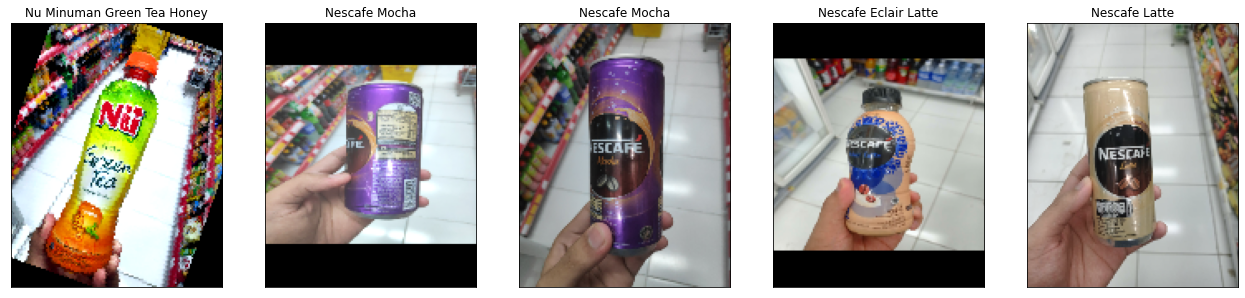

In [ ]:
view_image(images, CLASS_LABELS)

## Training Model

In [ ]:
val_dataset= images.take(20) 
train_dataset = images.skip(20)

In [ ]:
train_dataset= train_dataset.shuffle(2)
# train_dataset= train_dataset.map(augment)
train_dataset= train_dataset.cache('/')
train_dataset= train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
model= keras.Sequential([
    keras.Input(IMAGE_DIM),
    keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    keras.layers.AvgPool2D(pool_size=3, strides=2),
    keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    keras.layers.AvgPool2D(pool_size=3, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(2048, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(CLASS_LABELS), activation='softmax')
])

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.005)
reduce_lr= keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor= 0.9, patience=2, min_lr=0.0001, min_delta=0.001)

model.compile(optimizer= optimizer, loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_dataset, epochs=60, callbacks=[reduce_lr])

Epoch 1/60
87/87 [==============================] - 38s 228ms/step - loss: 2.2867 - accuracy: 0.1647 - lr: 0.0050
Epoch 2/60
87/87 [==============================] - 19s 215ms/step - loss: 1.6854 - accuracy: 0.2825 - lr: 0.0050
Epoch 3/60
87/87 [==============================] - 19s 216ms/step - loss: 1.5645 - accuracy: 0.3107 - lr: 0.0050
Epoch 4/60
87/87 [==============================] - 19s 215ms/step - loss: 1.5273 - accuracy: 0.3439 - lr: 0.0050
Epoch 5/60
87/87 [==============================] - 19s 216ms/step - loss: 1.4461 - accuracy: 0.3512 - lr: 0.0050
Epoch 6/60
87/87 [==============================] - 19s 217ms/step - loss: 1.5412 - accuracy: 0.3540 - lr: 0.0050
Epoch 7/60
87/87 [==============================] - 19s 217ms/step - loss: 1.4409 - accuracy: 0.3569 - lr: 0.0050
Epoch 8/60
87/87 [==============================] - 19s 218ms/step - loss: 1.4741 - accuracy: 0.3815 - lr: 0.0050
Epoch 9/60
87/87 [==============================] - 19s 218ms/step - loss: 1.4211 - accu

In [ ]:
model.evaluate(val_dataset)

20/20 [==============================] - 1s 45ms/step - loss: 0.2800 - accuracy: 0.9281


[0.2800324559211731, 0.9281250238418579]

In [ ]:
def visualize_predicted_data(test_dataset):
    global model
    global CLASS_LABELS

    image, label = next(iter(test_dataset))
    image = image.numpy()
    label = label.numpy()

    predicted_classes= model.predict(image)
    
    fig = plt.figure(figsize=(22, 22))
    for i in range(16):
        try:
            predicted_class= CLASS_LABELS[np.argmax(predicted_classes[i])]
            actual_class= CLASS_LABELS[label[i]]

            ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
            ax.imshow(image[i])
            ax.set_title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
        except:
            pass

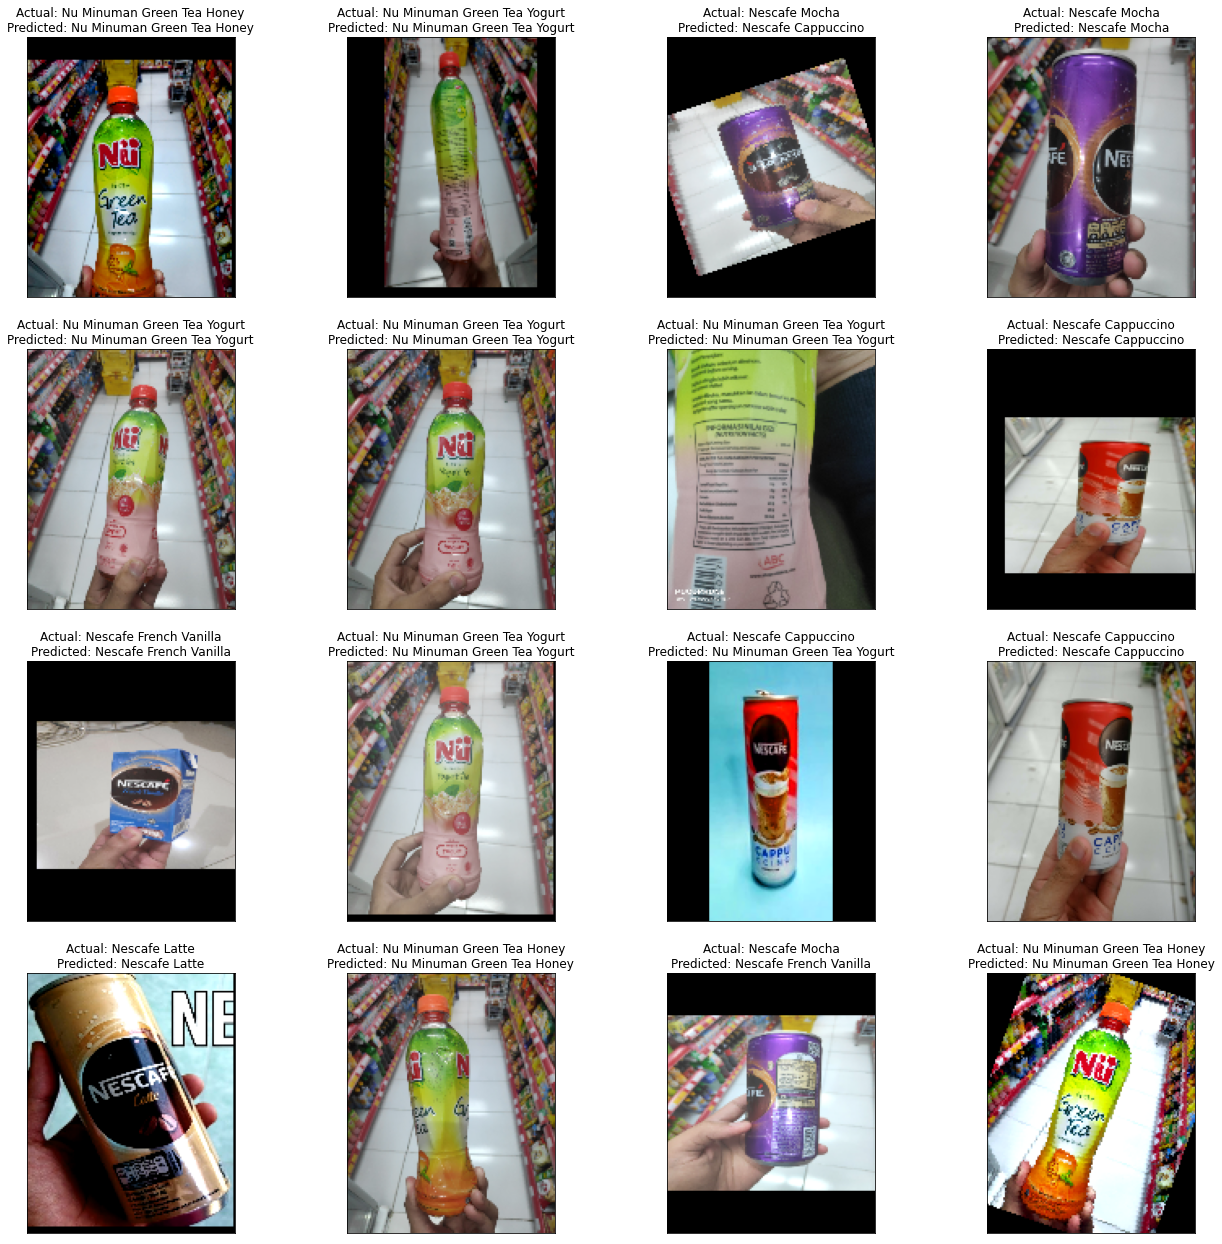

In [ ]:
visualize_predicted_data(val_dataset)

## Testing With New Data

In [ ]:
TEST_IMAGE_DIR= '/content/bottle_test_dataset'

In [ ]:
test_data= keras.utils.image_dataset_from_directory(
    directory= TEST_IMAGE_DIR, 
    batch_size= BATCH_SIZE,
    image_size= RESIZED_IMAGE_SIZE,
    shuffle= True,
    labels='inferred',
    class_names= CLASS_LABELS
)

Found 27 files belonging to 8 classes.


In [ ]:
test_data= test_data.map(normalize)

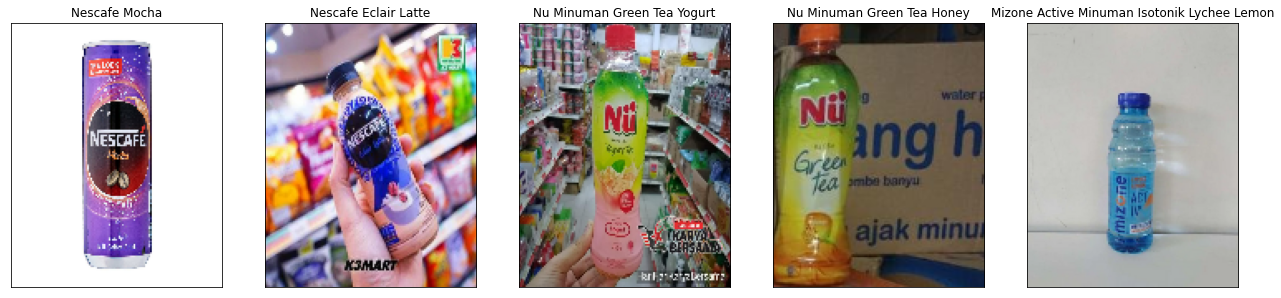

In [ ]:
view_image(test_data, CLASS_LABELS)

In [ ]:
model.evaluate(test_data)

2/2 [==============================] - 1s 683ms/step - loss: 2.5947 - accuracy: 0.5556


[2.5946741104125977, 0.5555555820465088]

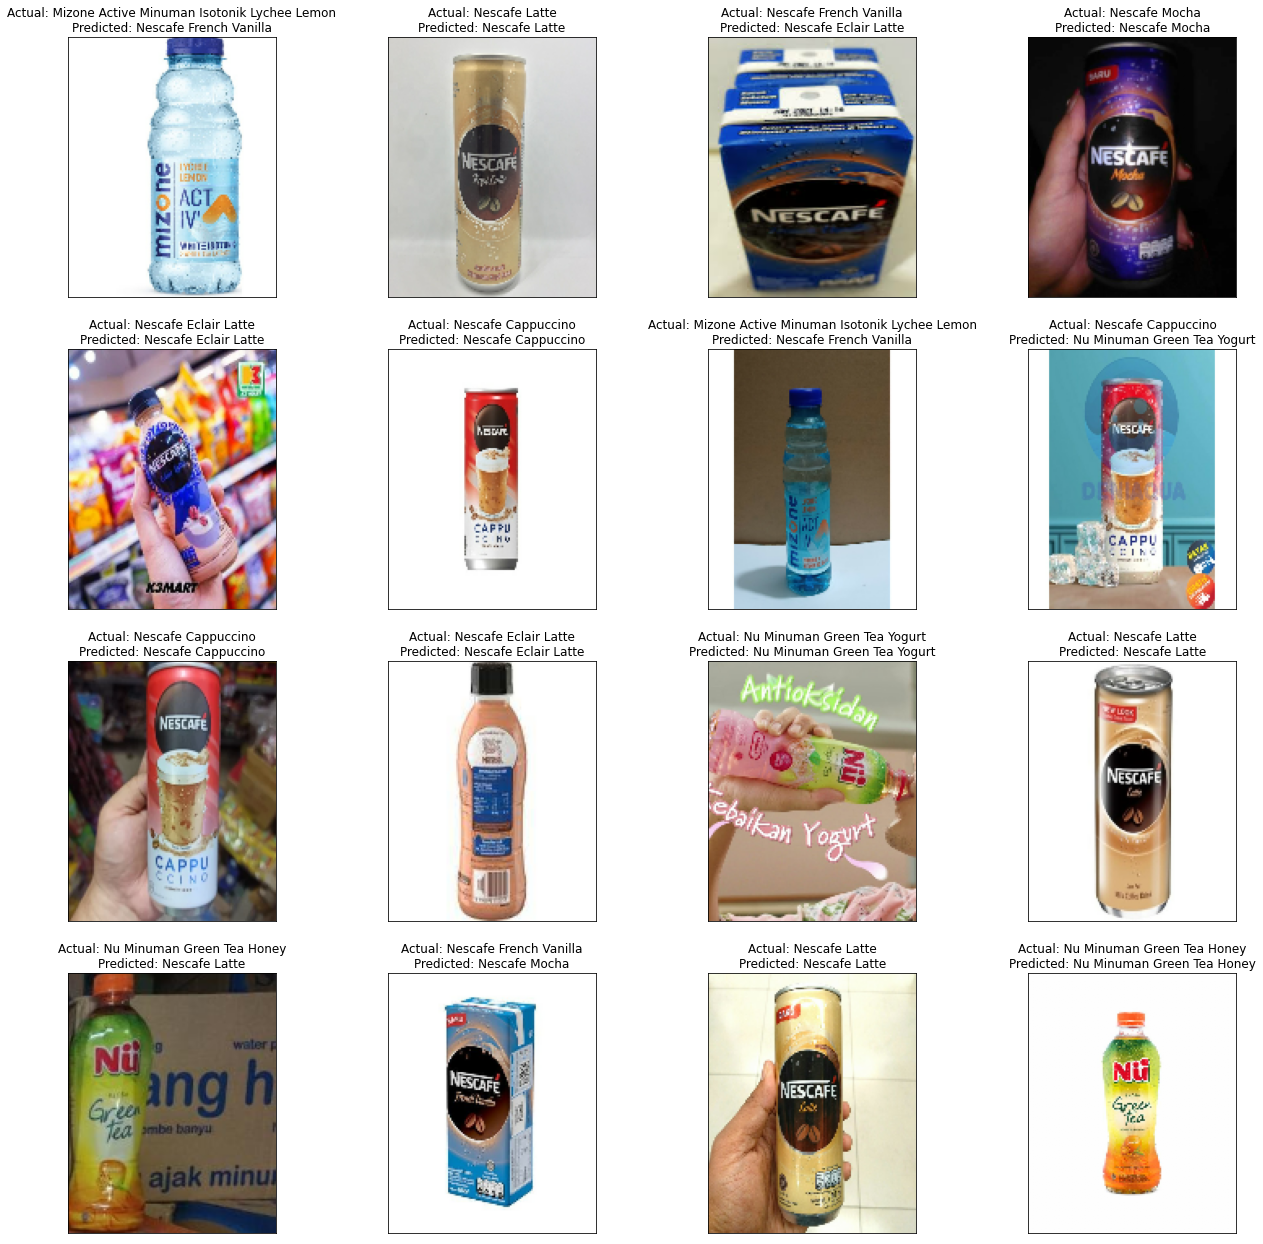

In [ ]:
visualize_predicted_data(test_data)

## Save Model

In [ ]:
model.save("prediksi_botol_minuman")

INFO:tensorflow:Assets written to: prediksi_botol_minuman/assets


In [ ]:
dir()

['BATCH_SIZE',
 'CLASS_LABELS',
 'IMAGE_DIM',
 'IMAGE_DIR',
 'In',
 'Out',
 'RESIZED_IMAGE_SIZE',
 'TEST_IMAGE_DIR',
 '_',
 '_21',
 '_22',
 '_29',
 '_34',
 '_36',
 '_38',
 '_41',
 '_6',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_sh',
 'cv',
 'drive',
 'exit',
 'get_ipython',
 'keras',
 'np',
 'os',
 'quit',
 'tf',
 'tfa']

In [ ]:
del aug_images, augment, img_idx, image, label, file_name, normalize, model, images, optimizer, plt, reduce_lr, test_data, train_dataset, val_dataset, view_image, visualize_predicted_data, parent_path, j

In [ ]:
!pip install numba

from numba import cuda
# all of your code and execution
cuda.select_device(0)
cuda.close()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("prediksi_botol_minuman") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('prediksi_botol_minuman.tflite', 'wb') as f:
  f.write(tflite_model)


In [ ]:
# !zip -r /content/prediksi_botol_minuman.zip /content/prediksi_botol_minuman

  adding: content/prediksi_botol_minuman/ (stored 0%)
  adding: content/prediksi_botol_minuman/saved_model.pb (deflated 89%)
  adding: content/prediksi_botol_minuman/assets/ (stored 0%)
  adding: content/prediksi_botol_minuman/variables/ (stored 0%)
  adding: content/prediksi_botol_minuman/variables/variables.index (deflated 72%)
  adding: content/prediksi_botol_minuman/variables/variables.data-00000-of-00001


zip error: Interrupted (aborting)


## Trash

In [ ]:
def augment(image, label):
    if np.random.randint(10, size=1)[0] < 1:
        return image, label

    if np.random.randint(10, size=1)[0] < 4:
        image = tf.image.random_contrast(image, lower=0.8, upper=1.75)

    if np.random.randint(10, size=1)[0] < 7:
        if np.random.randint(10, size=1)[0] < 5:
            image= tfa.image.rotate(image, np.random.randint(-70,70, 1)[0]/100)
        else:
            image= tfa.image.translate(image, [list(np.random.randint(-20,20, size=2))])   

    image = tf.image.random_brightness(image, max_delta=0.25)
    image = tf.image.random_flip_left_right(image)

    image= tf.image.random_saturation(image, lower=0.75, upper= 1.25)
    
    # boxes = tf.random.uniform(shape=(200, 4))
    # box_indices = tf.random.uniform(shape=(200,), minval=15, maxval=BATCH_SIZE, dtype=tf.int32)

    # image= tf.image.crop_and_resize(image, boxes, box_indices, crop_size=(160,128))

    return image, label

val2= val_dataset.map(augment)

view_image(val2, CLASS_LABELS)

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image
import numpy as np

from matplotlib import pyplot as plt

def predict_new_image():
    uploaded= files.upload()
    im= Image.open(BytesIO(list(uploaded.values())[0]))
    im= np.array(im)

    print('Image: ')
    plt.imshow(im)
    plt.xticks([])
    plt.yticks([])
    plt.show()

    im= tf.image.resize(im, IMG_SIZE)
    im/= 255
    im= np.expand_dims(im, 0)
    print(f'Each Classes Probability: {model.predict(im)}')
    print(f'Predicted Class: {CLASS_LABELS[np.argmax(model.predict(im))]}')

predict_new_image()

In [ ]:
local_zip = os.path.join(base_dir, 'rockpaperscissors.zip')
zip_ref = zipfile.ZipFile(local_zip, 'r')

for file in zip_ref.namelist():
    if file.startswith(tuple([os.path.join('rockpaperscissors', i) for i in ['rock', 'paper', 'scissors']])):
        zip_ref.extract(file, 'dataset/')

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

DATA_DIR= os.path.join(base_dir, 'rockpaperscissors')
BATCH_SIZE= 64
VAL_SPLIT= 0.4
IMG_SIZE= (200, 300)
CLASS_LABELS= ['paper', 'rock', 'scissors']

In [ ]:
IMAGE_DIM= list(IMG_SIZE)
IMAGE_DIM.append(3)
IMAGE_DIM= tuple(IMAGE_DIM)

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range= 10,
                    horizontal_flip= True,
                    vertical_flip= True,
                    width_shift_range= [-0.05, 0, 0.05],
                    brightness_range= [0.8, 1.1],
                    fill_mode= 'constant',
                    validation_split=0.4)
 
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.4)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        DATA_DIR,
        target_size= IMG_SIZE,
        batch_size= BATCH_SIZE,
        subset= 'training',
        class_mode='sparse',
        seed= 96)
    
validation_generator = val_datagen.flow_from_directory(
        DATA_DIR,
        target_size= IMG_SIZE,
        batch_size= BATCH_SIZE,
        subset= 'validation',
        class_mode='sparse',
        seed= 96)

In [ ]:
IMAGE_DIM= list(IMG_SIZE)
IMAGE_DIM.append(3)
IMAGE_DIM= tuple(IMAGE_DIM)

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range= 10,
                    horizontal_flip= True,
                    vertical_flip= True,
                    width_shift_range= [-0.05, 0, 0.05],
                    brightness_range= [0.8, 1.1],
                    fill_mode= 'constant',
                    validation_split=0.4)
 
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
        DATA_DIR,
        target_size= IMG_SIZE,
        batch_size= BATCH_SIZE,
        subset= 'training',
        class_mode='sparse',
        seed= 96)
    
validation_generator = val_datagen.flow_from_directory(
        DATA_DIR,
        target_size= IMG_SIZE,
        batch_size= BATCH_SIZE,
        subset= 'validation',
        class_mode='sparse',
        seed= 96)

model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape= IMAGE_DIM),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(CLASS_LABELS), activation='sigmoid')
])

loss= keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
reduce_lr= keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor= 0.9, patience=2, min_lr=0.0001, min_delta=0.005)

model.compile(loss= loss,
              optimizer= optimizer,
              metrics=['accuracy'])


In [ ]:
model.compile(loss= loss,
              optimizer= optimizer,
              metrics=['accuracy'])

